# Exploratory Data Analysis on Electric Vehicle

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import ConnectionPatch
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [6]:
df_4_wheeler_cardekho = pd.read_csv('/content/4-wheeler-EV-cardekho.csv')
df_4_wheeler_carwale = pd.read_csv('/content/4-wheeler-EV-carwale.csv')

# Electro-Mobility Customer Sentiments on  dataset Carwale [4-wheeler]

In [7]:
df = pd.read_csv('/content/4-wheeler-EV-carwale.csv')

## *Numerical data analysis*

In [8]:
df.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


* *Overview*-

* The dataset contains customer reviews for electric vehicles in the 4-wheeler segment, focusing on various aspects such as exterior design, comfort, performance, fuel economy, and value for money.
<br>
* Reviews vary in sentiment, with some customers expressing satisfaction and positive experiences with the cars, while others highlight concerns or issues they have encountered.
<br>
* Features like exterior design and comfort appear to be important factors for customers, as they are frequently mentioned in the reviews.
<br>
* Performance and fuel economy also receive attention, indicating customers' interest in the driving experience and efficiency of the electric vehicles.
<br>
* The dataset includes information about the condition of the cars (e.g., new or not purchased) and the distance driven, providing additional context for the reviews.
<br>
* Ratings provided by customers offer a quantitative measure of their satisfaction level across different aspects of the electric vehicles.
<br>
* The dataset features reviews for specific models, such as the Hyundai Kona, suggesting a focus on individual electric vehicle models within the 4-wheeler segment.
<br>

In [9]:
def dataframe_summary(df, null_value_summary=False, number_Summary = False):
  if null_value_summary:
    unique = []
    null_values = []
    columns = df.columns
    for feature in columns:
      unique.append(df[feature].nunique())
      null_values.append(df[feature].isnull().sum())
    data = {
        'Null Values' : null_values,
        'Unique Values' : unique
    }
    return pd.DataFrame(data, index = columns)

  if number_Summary:
    return df.describe()



In [10]:
dataframe_summary(df,null_value_summary=True)

,Null Values,Unique Values
review,0,129
Exterior,0,6
Comfort,0,6
Performance,0,6
Fuel Economy,0,6
Value for Money,0,6
Condition,0,3
driven,0,5
rating,0,5
model_name,0,3


* *Inferences*-

* **Null Values**: There are no null values present in any of the columns in the dataset, indicating that all fields have been populated with information.
<br>
* **Unique Values**:
** The 'review' column contains 129 unique reviews, suggesting diversity in customer feedback and opinions.
** The columns 'Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money' each have 6 unique values, indicating a range of ratings or sentiments expressed by customers across these aspects.
** The 'Condition' column has 3 unique values, likely indicating the condition of the vehicles mentioned in the reviews (e.g., new, used).
The 'driven' column contains 5 unique values, which may represent different ranges or categories of distance driven (e.g., few hundred kilometers, few thousand kilometers).
** The 'rating' column also has 5 unique values, presumably representing different numerical ratings given by customers.
The 'model_name' column has 3 unique values, suggesting that the dataset focuses on reviews for specific electric vehicle models.

In [11]:
dataframe_summary(df, number_Summary=True)

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,4.472868,4.418605,4.418605,4.418605,4.162791,4.341085
std,0.968871,1.036051,1.150392,1.122899,1.345076,1.389110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


* *Inferences*-
Inferences:

* Consistency in Ratings: The ratings across different aspects such as exterior, comfort, performance, and fuel economy tend to be consistently high, with means ranging from 4.42 to 4.47 out of 5. This suggests that customers generally perceive the electric vehicles positively across various features.

* Perceived Value: While customers rate aspects like exterior, comfort, and performance highly, the mean rating for "Value for Money" is slightly lower at 4.16. This indicates that some customers may perceive the cost relative to the features or benefits offered as less favorable compared to other aspects of the electric vehicles.

* High Satisfaction: The median (50th percentile) and the 75th percentile ratings for all aspects are at the maximum value of 5, indicating that a significant proportion of customers give top ratings to the electric vehicles in the dataset. This suggests a high level of satisfaction among customers overall.

* Variance in Ratings: The standard deviations for each aspect are relatively low, indicating limited variability in ratings across customers. This suggests a degree of agreement or consensus among customers regarding their evaluations of the electric vehicles.

* Potential Improvement Areas: Despite generally positive ratings, the presence of minimum ratings of 0 for some aspects indicates instances where customers have rated certain features poorly. Understanding the reasons behind these low ratings could help identify areas for improvement in the design or performance of the electric vehicles.

In [12]:
def Unique_values_categorical_features(df, unique_value_threshold=20):

  columns = df.columns
  filtered_columns  = []
  for feature in columns:
    if df[feature].nunique()<= unique_value_threshold:
      filtered_columns.append(feature)
  data = {

  }
  for feature in filtered_columns:
    data[feature] = [[unique_value] for unique_value in df[feature].unique()]
  length = 0
  for List in (data.values()):
    if len(List) > length:
      length = len(List)

  for List in data.values():
    List.extend(['XX'] * (length - len(List)))

  return pd.DataFrame(data)

In [13]:
Unique_values_categorical_features(df)

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,[5.0],[4.0],[5.0],[5.0],[5.0],[New],[Few hundred kilometers],[5.0],[hyundai kona]
1,[1.0],[1.0],[1.0],[1.0],[1.0],[Not Purchased],[Haven't driven it],[0.0],[tata nexon ev]
2,[4.0],[5.0],[4.0],[3.0],[4.0],[Used],[Few thousand kilometers],[3.0],[tata tigor ev]
3,[3.0],[3.0],[2.0],[4.0],[2.0],XX,[Did a short drive once],[4.0],XX
4,[0.0],[2.0],[3.0],[0.0],[3.0],XX,[Its my mate since ages],[2.0],XX
5,[2.0],[0.0],[0.0],[2.0],[0.0],XX,XX,XX,XX


* *Motive of above operation*-
* The resulting dataframe can be useful for exploratory data analysis, providing insights into the distribution and diversity of categorical feature values across the dataset.
* It can also serve as a basis for further data preprocessing or feature engineering tasks, such as encoding categorical variables for machine learning models


## Exploratory data analysis

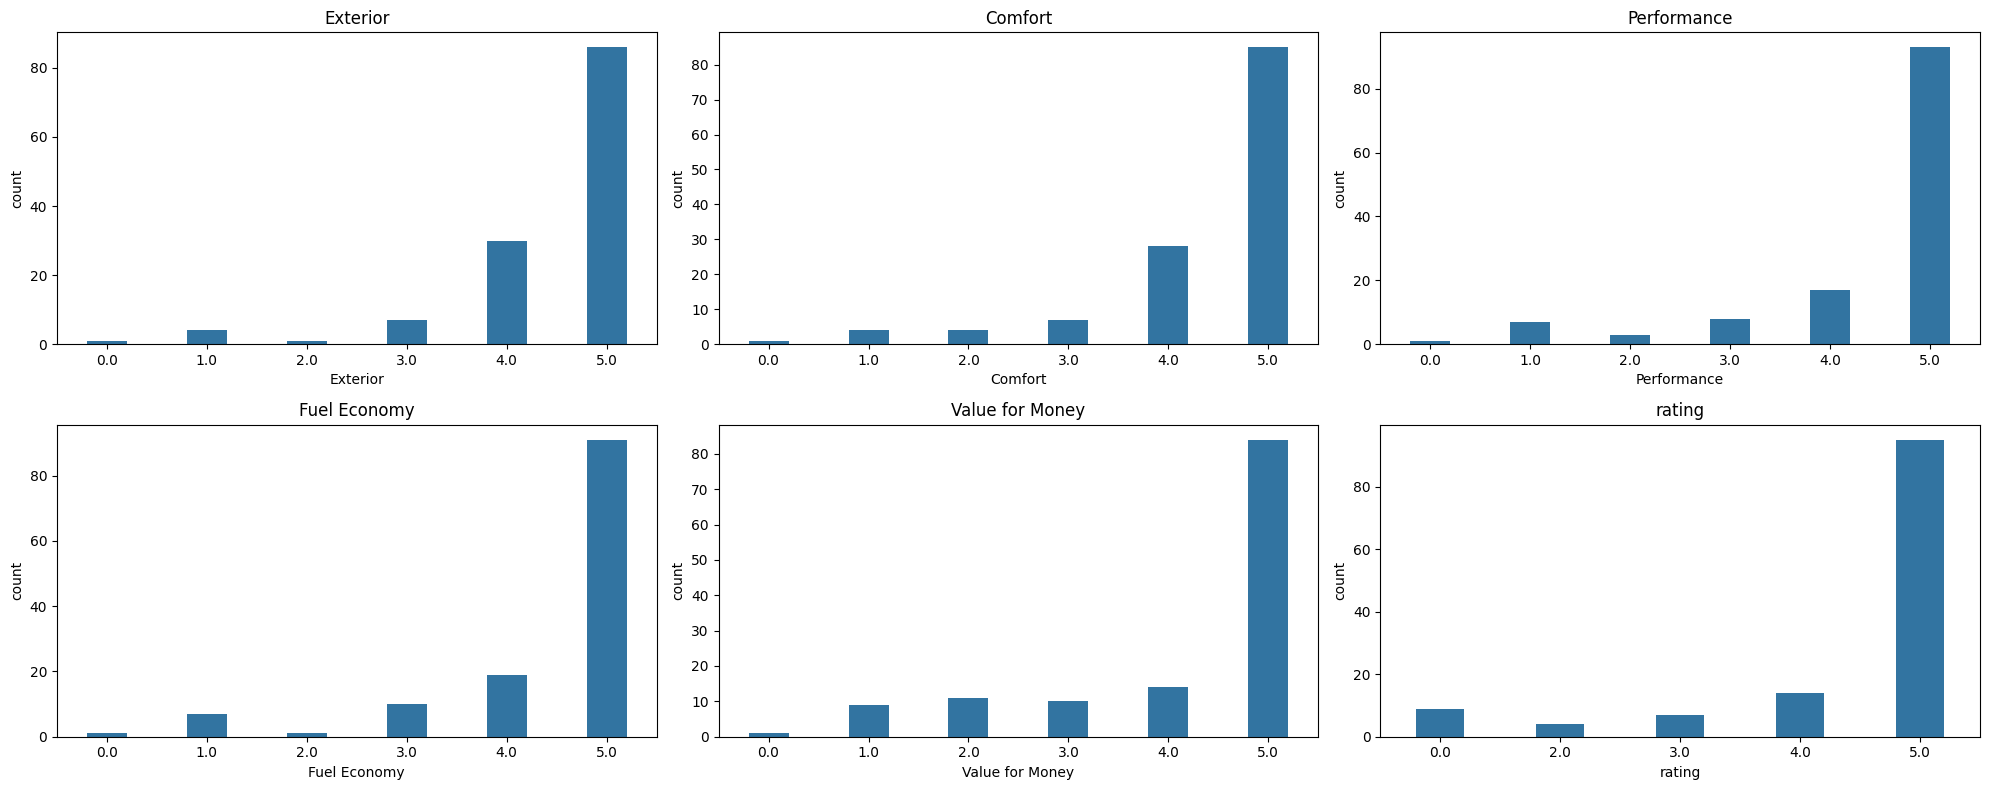

In [14]:
# Create a figure and 5 subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

# Assuming you have 5 features/columns in your DataFrame for which you want to create countplots
features = ['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'rating']

# Loop through each subplot and each feature to create countplots
for i, ax in enumerate(axes.flatten()):
    # Check if there are still features to plot
        sns.countplot(x=features[i], data=df, ax=ax, width = 0.4, )
        ax.set_title(features[i])

plt.tight_layout()

# Show the plots
plt.show()


* *Inference*
* The features of electric vehicles (EVs), including exterior design, comfort, performance, and other aspects. Customers consistently express contentment with these attributes, suggesting a positive overall perception of EVs in terms of their design, functionality, and driving experience

### How user perspective changes with the car condition

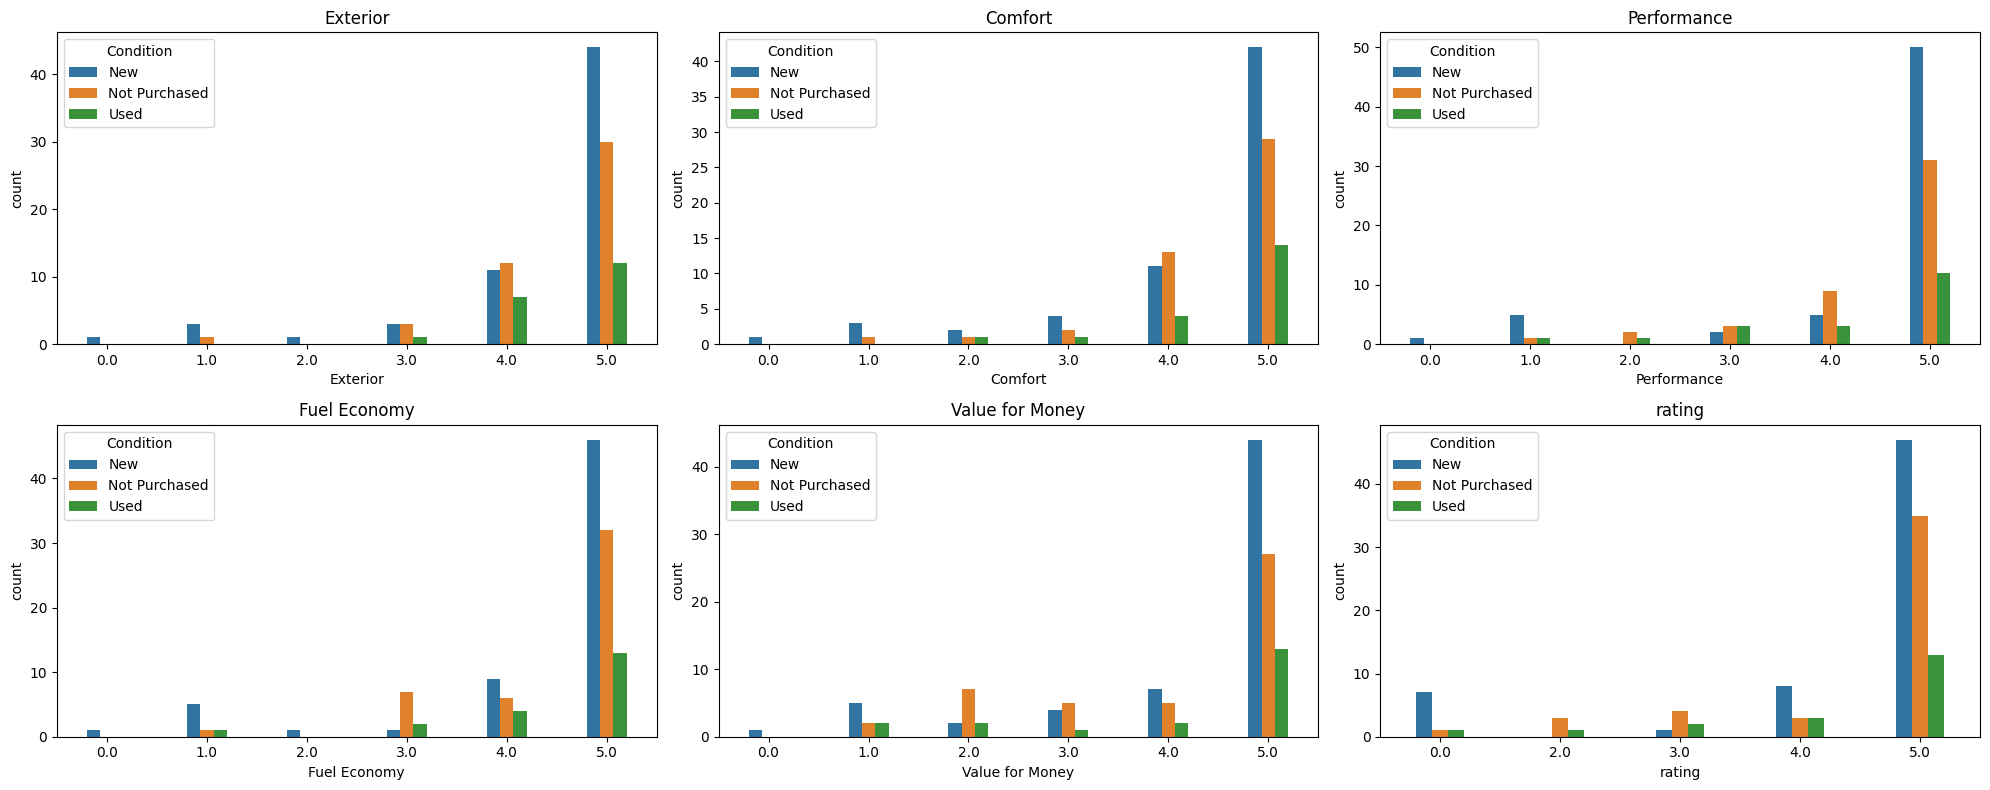

In [15]:
# Create a figure and 5 subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

# Assuming you have 5 features/columns in your DataFrame for which you want to create countplots
features = ['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'rating']

# Loop through each subplot and each feature to create countplots
for i, ax in enumerate(axes.flatten()):
    # Check if there are still features to plot
        sns.countplot(x=features[i], data=df, ax=ax, width = 0.4, hue = 'Condition')
        ax.set_title(features[i])

plt.tight_layout()

# Show the plots
plt.show()


* *Inferences*-
* Users exhibit more positive sentiments towards newly purchased vehicles, indicating a correlation between satisfaction and the freshness of ownership.

* Even for electric vehicles (EVs) that users have not yet purchased, their opinions lean towards the positive, suggesting a favorable inclination towards considering EVs for future acquisition

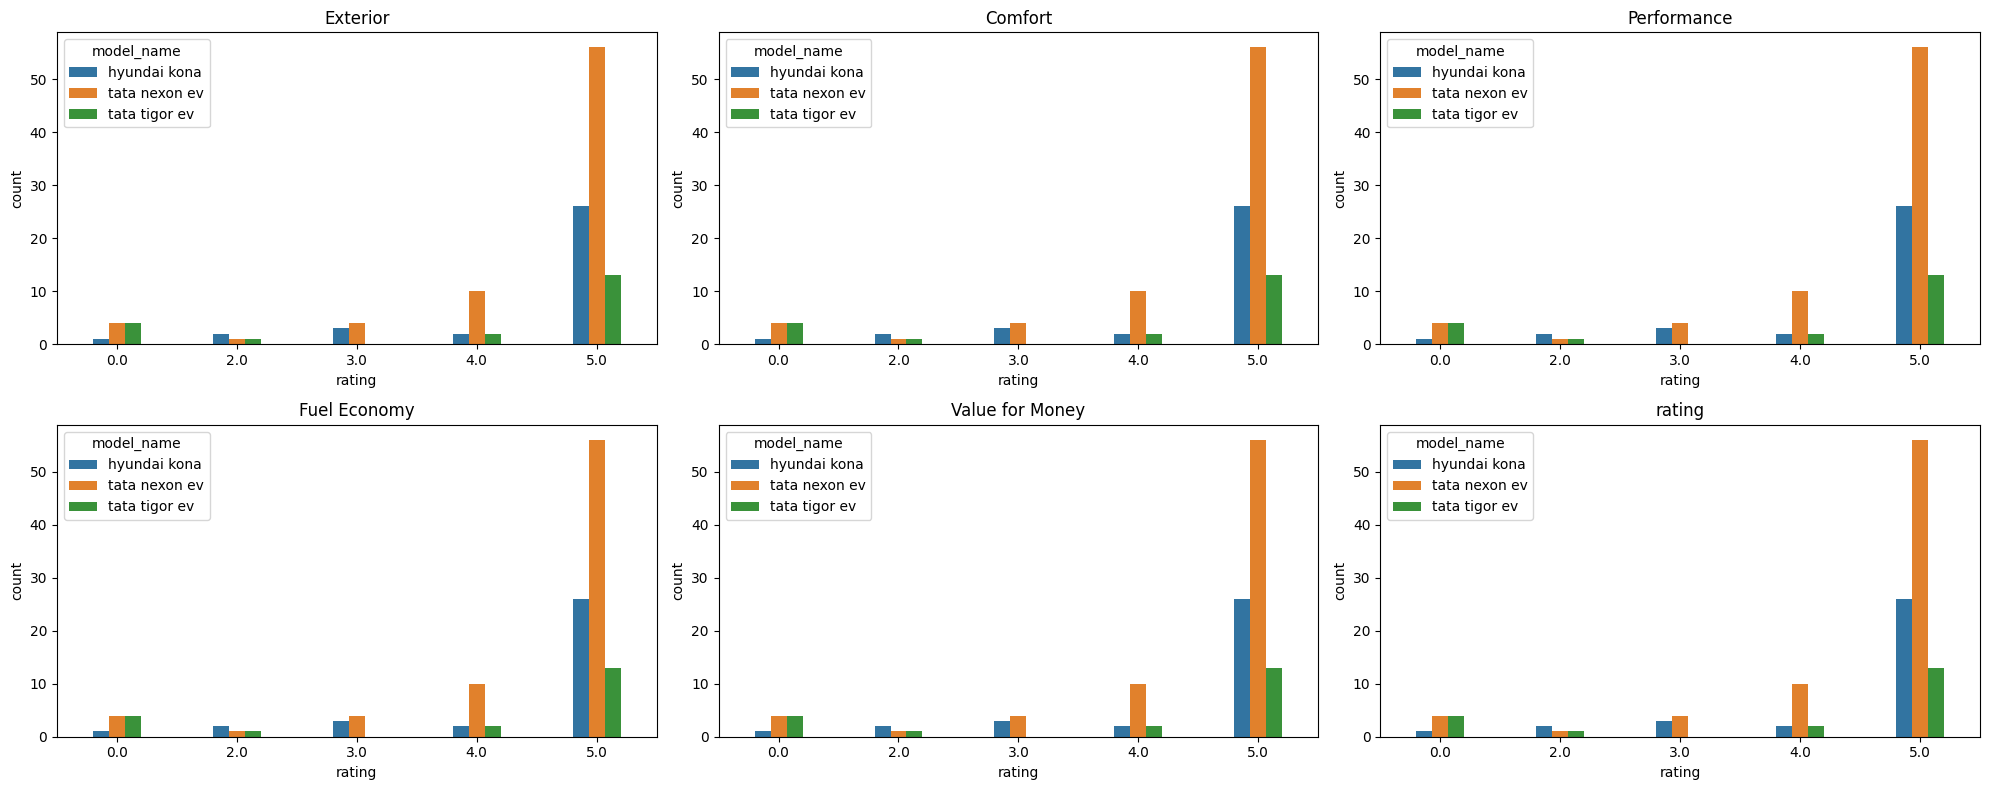

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

# Assuming you have 5 features/columns in your DataFrame for which you want to create countplots
features = ['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'rating']

# Loop through each subplot and each feature to create countplots
for i, ax in enumerate(axes.flatten()):
    # Check if there are still features to plot
        sns.countplot(
    data = df, x = 'rating', hue = 'model_name', width = 0.4, ax=ax
)
        ax.set_title(features[i])

plt.tight_layout()

# Show the plots
plt.show()


* *Inferences*-
* Tata's Nexon EV emerges as the leader across all features, including economy, comfort, performance, and more.
* Hyundai's Kona secures the second position, with Tata's Tigor following closely behind.

### Peoples intentions in adopting Electric vehicle

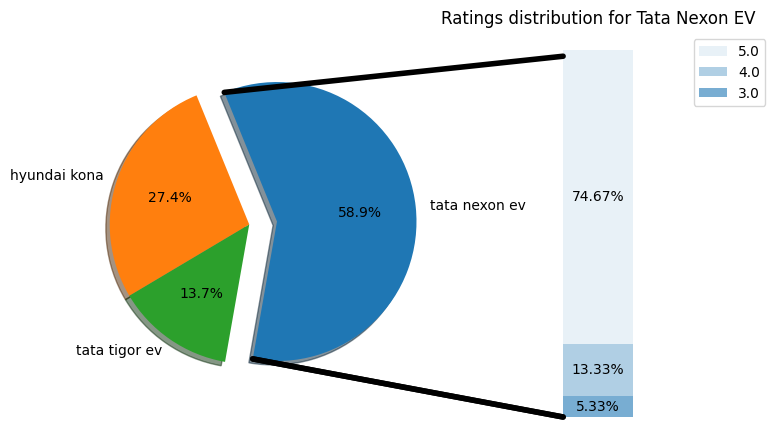

In [17]:


# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)


# Pie chart parameters
overall_ratios = [.27, .56, .17]
explode = [0.2, 0, 0]
angle = -180 * overall_ratios[0]

models = ['tata nexon ev', 'hyundai kona', 'tata tigor ev']
models_length = []
for model in models:
    models_length.append(len(df.loc[(df['model_name'] == model) & (df['rating'] == 5.0)]))

wedges, *_ = ax1.pie(models_length, labels=models, autopct='%1.1f%%', shadow=True, radius=1, startangle=-100,
                     explode=explode)


# bar chart parameters

# Collecting ratings for tata Nexon (only 3.0, 4.0, and 5.0)
ratings = [3.0, 4.0, 5.0]
nexon_ratings = []
total_nexon_count = len(df[df['model_name'] == 'tata nexon ev'])

for rating in ratings:
    rating_count = len(df[(df['model_name'] == 'tata nexon ev') & (df['rating'] == rating)])
    rating_percentage = rating_count * 100 / total_nexon_count
    nexon_ratings.append(rating_percentage)

ratings = list(map(str, ratings))
bottom = 1.5
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(nexon_ratings, ratings)])):
    bottom -= height
    # Ensure that alpha is between 0 and 1
    alpha = min(1.0, 0.1 + 0.25 * j)
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label, alpha=alpha)
    ax2.bar_label(bc, labels=[f"{height:.2f}%"], label_type='center')

ax2.set_title("Ratings distribution for Tata Nexon EV")
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(nexon_ratings)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,  # Changed the y-coordinate to 0
                      xyB=(x, y), coordsB=ax1.transData)

# draw bottom connecting line
x_bottom = r * np.cos(np.pi / 180 * theta1) + center[0]
y_bottom = r * np.sin(np.pi / 180 * theta1) + center[1]
con2 = ConnectionPatch(xyA=(-width / 2, bottom), coordsA=ax2.transData,
                       xyB=(x_bottom, y_bottom), coordsB=ax1.transData)

con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

con2.set_color([0,0,0])
con2.set_linewidth(4)
ax2.add_artist(con2)

# Add the bottom connection line to the plot
ax2.add_artist(con2)

plt.show()


* *Inferences*-
* Tata's Nexon EV dominates the market, capturing over 50% of the electric vehicle (EV) market share among all EV companies.
* Within Tata's Nexon EV, a significant majority, approximately 75% of users, provide a 5-star rating, indicating overwhelmingly positive feedback and satisfaction from users.

## Model training [Kmeans Clustering]

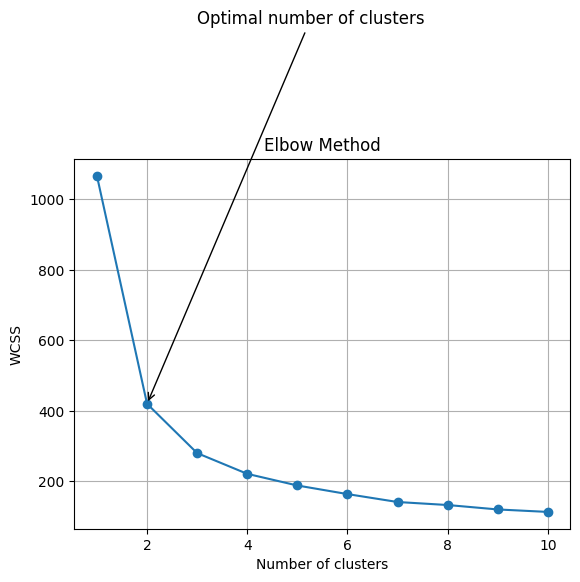

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
X = df[['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'rating']]

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')  # Add marker at each data point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.annotate('Optimal number of clusters', xy=(2, wcss[1]), xytext=(3, 1500),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
plt.show()



* The elbow method plot for K-means clustering reveals a clear elbow point at k=2, where the within-cluster sum of squares (WCSS) sharply decreases. Beyond this point, the decline in WCSS becomes more gradual, indicating diminishing returns in terms of reducing intra-cluster variance. This suggests that the optimal number of clusters for the given dataset is likely 2, as adding more clusters does not significantly improve the clustering performance.

In [87]:
def Segment_scatter_plot(df,column1,column2):
  # Assuming 'df' is your DataFrame containing the data
  X = df[['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'rating']]

  # Applying KMeans with 4 clusters
  kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
  y_kmeans = kmeans.fit_predict(X)

  # Adding cluster labels to the DataFrame
  df['Cluster'] = y_kmeans

  # Visualizing the clusters on a scatter plot
  plt.figure(figsize=(10, 6))

  # Assigning colors for each cluster
  colors = ['blue', 'green', 'orange', 'purple']

  for cluster in range(2):
      plt.scatter(X[y_kmeans == cluster][column1], X[y_kmeans == cluster][column2], label=f'Cluster {cluster}', color=colors[cluster])
      plt.scatter(kmeans.cluster_centers_[cluster, 0], kmeans.cluster_centers_[cluster, 1], s=300, c=colors[cluster],  marker='X')

  plt.title('Clusters of Car Reviews')
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.legend()
  plt.show()

In [94]:
kmeans.cluster_centers_

array([[2.89473684, 2.57894737, 2.15789474, 2.47368421, 1.52631579,
        1.63157895],
       [4.74545455, 4.73636364, 4.80909091, 4.75454545, 4.61818182,
        4.80909091]])

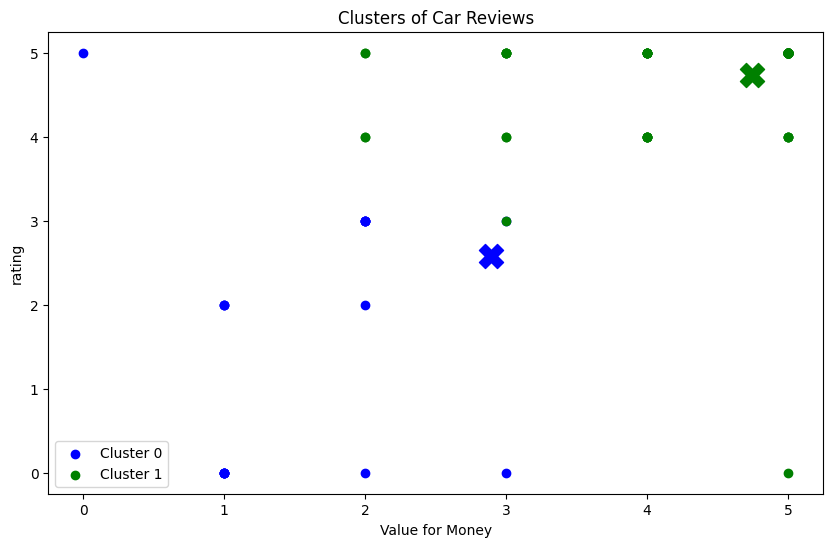

In [88]:
Segment_scatter_plot(df,'Value for Money','rating')

* *Inferences*-
* Here cluster 1 is showing positive sentiments of the peoples for the ev models
* In contrast, cluster 0 shows the negeative sentiments

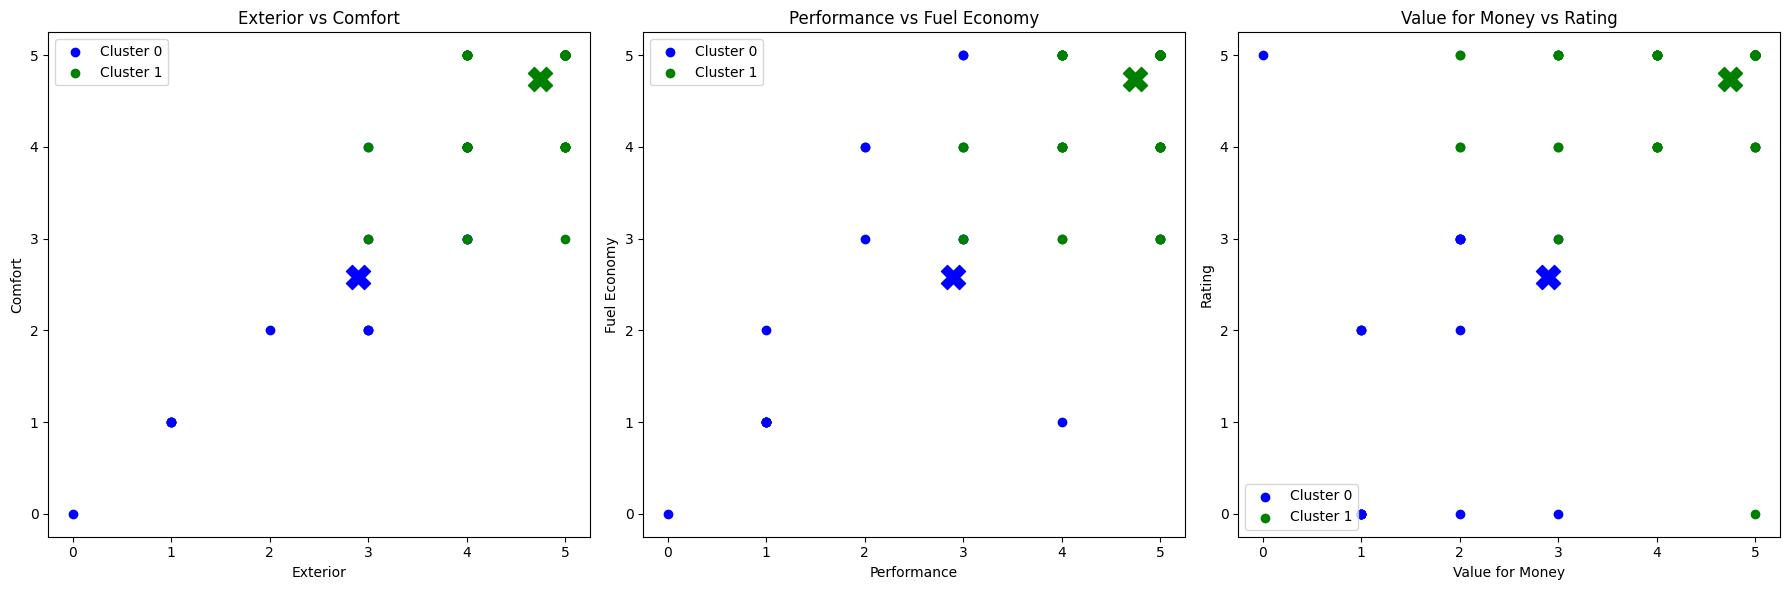

In [96]:
# Assuming 'df' is your DataFrame containing the data
X = df[['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'rating']]

# Applying KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Adding cluster labels to the DataFrame
df['Cluster'] = y_kmeans

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

colors = ['blue', 'green', 'orange', 'purple']

# Scatter plot for 'Exterior' and 'Comfort'
axs[0].scatter(X[y_kmeans == 0]['Exterior'], X[y_kmeans == 0]['Comfort'], label='Cluster 0', color='blue')
axs[0].scatter(X[y_kmeans == 1]['Exterior'], X[y_kmeans == 1]['Comfort'], label='Cluster 1', color='green')
for cluster in range(2):
  axs[0].scatter(kmeans.cluster_centers_[cluster, 0], kmeans.cluster_centers_[cluster, 1], s=300, c=colors[cluster],  marker='X')
axs[0].set_xlabel('Exterior')
axs[0].set_ylabel('Comfort')
axs[0].set_title('Exterior vs Comfort')
axs[0].legend()

# Scatter plot for 'Performance' and 'Fuel Economy'
axs[1].scatter(X[y_kmeans == 0]['Performance'], X[y_kmeans == 0]['Fuel Economy'], label='Cluster 0', color='blue')
axs[1].scatter(X[y_kmeans == 1]['Performance'], X[y_kmeans == 1]['Fuel Economy'], label='Cluster 1', color='green')
for cluster in range(2):
  axs[1].scatter(kmeans.cluster_centers_[cluster, 0], kmeans.cluster_centers_[cluster, 1], s=300, c=colors[cluster],  marker='X')
axs[1].set_xlabel('Performance')
axs[1].set_ylabel('Fuel Economy')
axs[1].set_title('Performance vs Fuel Economy')
axs[1].legend()

# Scatter plot for 'Value for Money' and 'rating'
axs[2].scatter(X[y_kmeans == 0]['Value for Money'], X[y_kmeans == 0]['rating'], label='Cluster 0', color='blue')
axs[2].scatter(X[y_kmeans == 1]['Value for Money'], X[y_kmeans == 1]['rating'], label='Cluster 1', color='green')
for cluster in range(2):
  axs[2].scatter(kmeans.cluster_centers_[cluster, 0], kmeans.cluster_centers_[cluster, 1], s=300, c=colors[cluster],  marker='X')
axs[2].set_xlabel('Value for Money')
axs[2].set_ylabel('Rating')
axs[2].set_title('Value for Money vs Rating')
axs[2].legend()

plt.tight_layout()
plt.show()


# Dataset 2 - 2 wheeler-EV-bikewale

In [21]:
df2 = pd.read_csv('/content/2-wheeler-EV-bikewale.csv')

In [22]:
df2.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


* *Overview*-
* Varied Usage Patterns:

* Users employ the electric vehicle (EV) for diverse purposes, including daily commuting, occasional rides, and longer-term ownership, as indicated by the "Used it for" and "Owned for" columns.
* A subset of users mentions riding the EV for specific durations, ranging from less than three months to over a year, suggesting varying levels of experience with the vehicle.

**Performance Concerns**:

* Some users express dissatisfaction with the performance of the EV, citing issues such as poor acceleration or overall vehicle performance. This is evident from reviews highlighting concerns about performance.
Reliability and Maintenance:

* While reliability and maintenance-related features are mentioned in the dataset ("Reliability", "Maintenance cost"), they appear to have missing or incomplete information, suggesting a potential area for data improvement or refinement.
Visual Appeal and Comfort:

* Users provide ratings for visual appeal and comfort, indicating their subjective assessments of these aspects of the EV.
Positive ratings for visual appeal and comfort suggest that these features are valued by users and may influence their overall satisfaction with the EV.
Value for Money:

* The "Value for Money" feature receives mixed reviews, with some users expressing satisfaction with the EV's cost-effectiveness, while others raise concerns about the perceived value relative to the purchase price.
Service Experience:

* Users also share their experiences with service-related aspects, such as service quality or availability of spare parts, which can significantly impact their overall satisfaction with the EV.
Model-Specific Insights:

* These insights are derived from reviews of the TVS iQube model. Further analysis across different EV models may provide additional insights into user perceptions and experiences within the EV market.

In [23]:
dataframe_summary(df2, null_value_summary = True)

,Null Values,Unique Values
review,47,796
Used it for,0,5
Owned for,0,6
Ridden for,176,5
rating,0,5
Visual Appeal,105,5
Reliability,128,5
Performance,499,5
Service Experience,141,5
Extra Features,659,5


* *Inferences on null values*-

**Review:**

* There are 47 null values in the 'Review' column, indicating missing or unspecified information.
The 'Review' column contains 796 unique values, suggesting a wide range of opinions and experiences shared by users.
Used it for:

* There are no null values in the 'Used it for' column, indicating that all entries specify the purpose for which the electric vehicle (EV) was used.
The 'Used it for' column has 5 unique values, representing different usage scenarios for the EV.
Owned for:

* There are no null values in the 'Owned for' column, implying that all entries specify the duration of ownership for the EV.
The 'Owned for' column contains 6 unique values, indicating varying durations of ownership among users.
Ridden for:

* There are 176 null values in the 'Ridden for' column, suggesting that information regarding the duration of riding the EV is missing or not provided for a significant number of entries.
The 'Ridden for' column has 5 unique values, representing different durations of riding the EV.

**Rating:**

* There are no null values in the 'Rating' column, indicating that all entries provide a rating for the EV.
* The 'Rating' column contains 5 unique values, representing different rating scores assigned by users.
* Visual Appeal, Reliability, Performance, Service Experience, Extra Features, Comfort, Maintenance Cost, Value for Money:

* These columns have varying numbers of null values, suggesting missing or unspecified information related to these aspects of the EV.
* Each of these columns contains 5 unique values, representing different ratings or assessments provided by users for the corresponding aspect of the EV.
Model Name:

* There are no null values in the 'Model Name' column, indicating that all entries specify the name of the EV model.
* The 'Model Name' column contains 39 unique values, representing different EV models mentioned in the dataset.

In [24]:
def columns_with_high_null(df, threshold):
    # Calculate the percentage of null values for each column
    null_percentage = df.isnull().mean() * 100

    # Filter columns with null percentage higher than the threshold
    high_null_columns = null_percentage[null_percentage > threshold]

    print('Columns with more than {}% null values:'.format(threshold))
    for column, percentage in high_null_columns.items():
        print("{:<20}: {:.2f}%".format(column, percentage))

    return high_null_columns.index.tolist()


* Lets set a threshold of 40% and remove all the features which go beyond this values

In [25]:
columns_with_high_null(df2, 40)

Columns with more than 40% null values:
Performance         : 59.12%
Extra Features      : 78.08%
Maintenance cost    : 78.67%
Value for Money     : 53.79%


['Performance', 'Extra Features', 'Maintenance cost', 'Value for Money']

* *Inferences*-
**Performance (59.12% Null):**

* The 'Performance' column has a high percentage of null values, indicating that performance-related information is missing or not provided for a significant portion of the dataset.
* Missing data in this column may hinder the analysis of user perceptions and experiences regarding the performance of electric vehicles (EVs).
Extra Features (78.08% Null):

* With over 78% null values, the 'Extra Features' column lacks comprehensive information about additional features or amenities offered by the EV models.
The absence of data in this column limits insights into the presence and significance of supplementary features in EVs, which could influence user preferences and satisfaction.

In [26]:
df2.drop(['Performance','Extra Features','Maintenance cost','Value for Money'], axis=1, inplace = True)

Text(0, 0.5, 'Frequency')

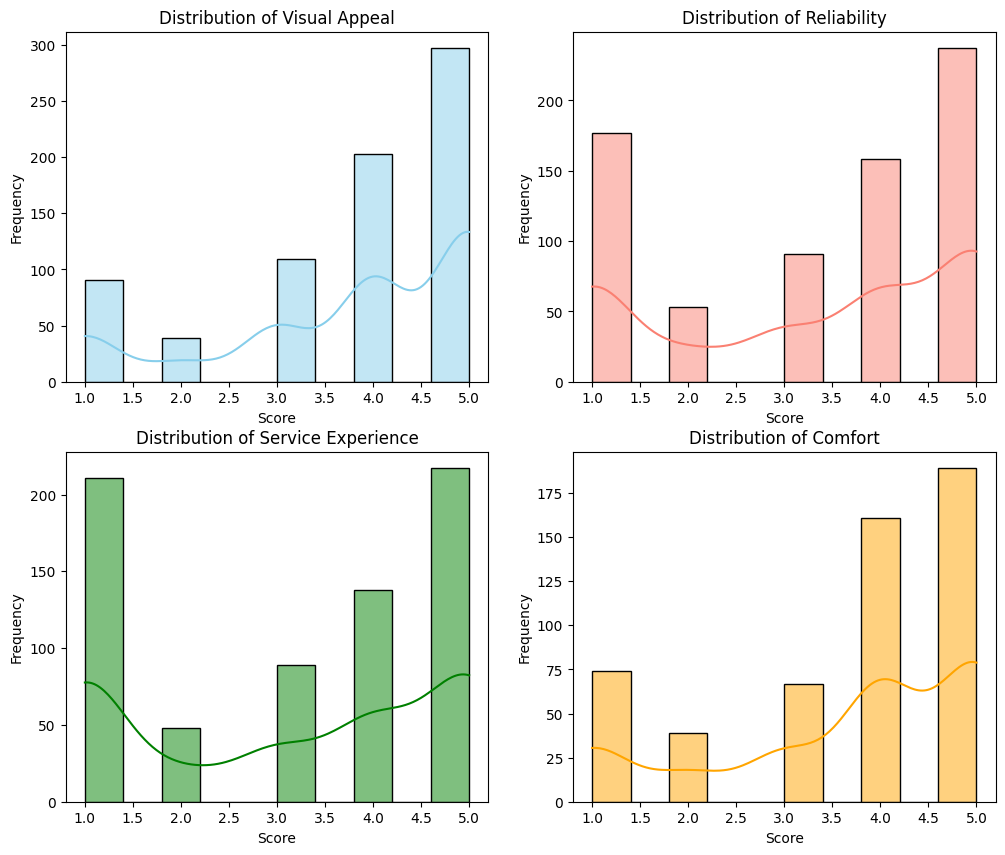

In [28]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Visual Appeal
sns.histplot(data=df2, x='Visual Appeal', bins=10, kde=True, color='skyblue', label='Visual Appeal', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Visual Appeal')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')

# Plot Reliability
sns.histplot(data=df2, x='Reliability', bins=10, kde=True, color='salmon', label='Reliability', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Reliability')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Frequency')

# Plot Service Experience
sns.histplot(data=df2, x='Service Experience', bins=10, kde=True, color='green', label='Service Experience', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Service Experience')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Frequency')

# Plot Comfort
sns.histplot(data=df2, x='Comfort', bins=10, kde=True, color='orange', label='Comfort', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Comfort')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout


* *Inferences*-

* Users consistently assign a 5-star rating to the visual appeal of electric vehicles (EVs), indicating a widespread appreciation for their aesthetic design and appearance.

* Service emerges as a predominant concern among EV users, regardless of the specific model. This underscores the significance of service quality and support infrastructure in shaping user satisfaction and overall experiences with EVs.

* The attractiveness and comfort offered by EVs are key factors that attract users to these vehicles. These features play a pivotal role in influencing consumer preferences and fostering adoption of EV technology.

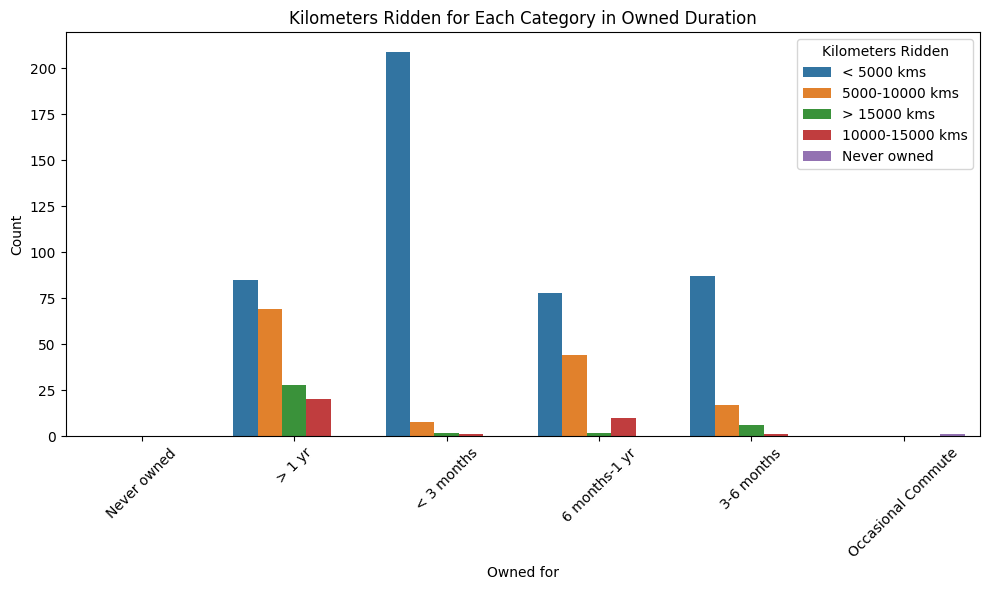

In [30]:
# Plotting countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Owned for', hue='Ridden for')
plt.title('Kilometers Ridden for Each Category in Owned Duration')
plt.xlabel('Owned for')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Kilometers Ridden')
plt.tight_layout()
plt.show()

* *Inferences*-

* There exists a diverse range of users who have owned electric vehicles (EVs) for over a year (> 1 year). Among this group, there are individuals who have traveled significant distances, surpassing 15,000 kilometers within the ownership period. Conversely, there are also users who have traveled comparatively shorter distances, with some not exceeding 5,000 kilometers in a year. This variability in usage patterns underscores the different driving habits, needs, and preferences among EV owners.



<ipython-input-31-d071137026d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Used it for', palette='viridis')


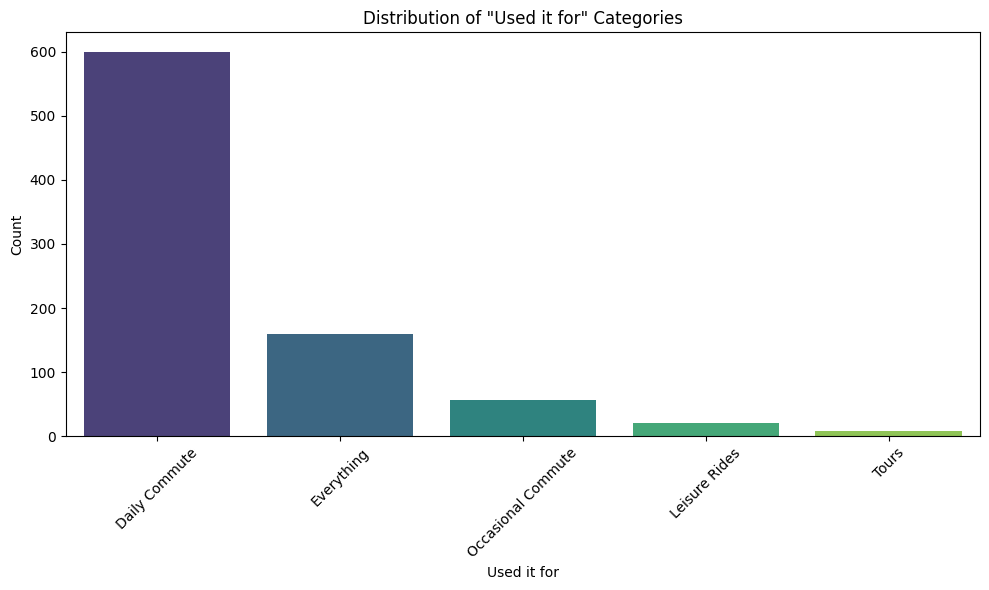

In [31]:
# Plotting bar chart for 'Used it for' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Used it for', palette='viridis')
plt.title('Distribution of "Used it for" Categories')
plt.xlabel('Used it for')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* *Inferences*-
* The majority of users prefer electric vehicles (EVs) for daily commuting purposes, indicating a prevalent inclination towards using EVs as a convenient and sustainable mode of transportation for regular travel needs.

* Conversely, there is a noticeable reluctance among users to utilize their EV bikes for tours or long-distance trips. This preference may stem from various reasons, including the perception that bikes may not be the preferred choice for extended travel, as well as considerations related to range anxiety, charging infrastructure, and comfort during long rides.

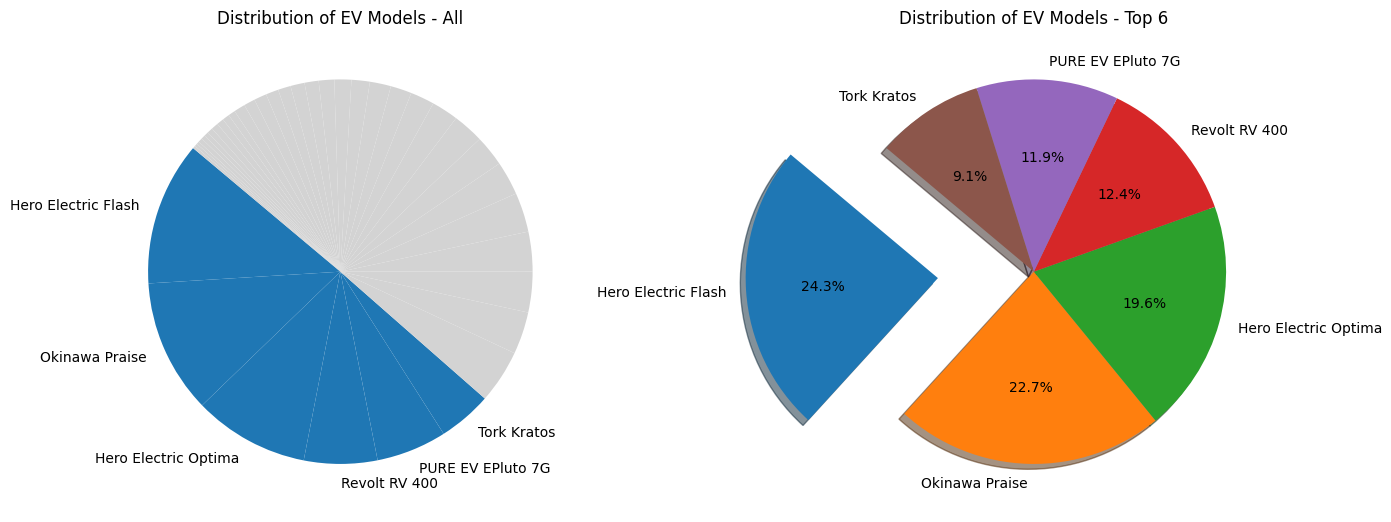

In [33]:
# Grouping by Model Name and counting occurrences, then sorting by count
model_counts = df2['Model Name'].value_counts().sort_values(ascending=False)

# Extracting the top 6 companies
top_6_companies = model_counts.index[:6]

# Filter models for the top 6 companies
top_6_models = model_counts[model_counts.index.isin(top_6_companies)]

# Calculate total count for models not in top 6 companies
other_count = model_counts[~model_counts.index.isin(top_6_companies)].sum()

# Create labels for top 6 companies
labels_top_6 = top_6_models.index  # Use the index of top_6_models as labels

# Plotting pie chart for all models with blurred background
plt.figure(figsize=(14, 8))  # Adjust the figure size to accommodate both subplots


# color for pie chart 1
colors = ['lightgrey' if model not in top_6_models.index else 'darkred' if model == 'hero electric flash' else None
          for model in model_counts.index]
labels = [model if model in top_6_models.index else '' for model in model_counts.index]


# Subplot 1: Pie chart with blurred background
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.pie(model_counts, labels=labels, startangle=140, colors=colors)  # No need to specify colors for background
plt.title('Distribution of EV Models - All')

# Plotting pie chart for top 6 companies
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.pie(top_6_models, labels=labels_top_6, autopct='%1.1f%%',
        startangle=140, shadow=True, explode=(0.5,0,0,0,0,0))

plt.title('Distribution of EV Models - Top 6')

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


* *Inferences*-
* Analysis indicates that a significant portion of the electric two-wheeler sector is dominated by six prominent models, namely Hero Electric Flash, Okinawa Praise, Hero Electric Optima, Revolt RV 400, PURE EV EPluto 7G, and Tork Kratos.

* These six models collectively account for approximately 50% of the market share in the electric two-wheeler segment, highlighting their substantial presence and popularity among consumers.

* Within this group of top models, Hero Electric Flash emerges as the frontrunner, commanding around 25% of the market share among the top six models. This underscores the strong market position and widespread acceptance of the Hero Electric Flash model within the electric two-wheeler market.

##3. Feature extraction

In [34]:
# Removing all the null values in 'review' feature
df2.dropna(subset=['review'], inplace = True)

In [35]:
# Step 1: Preprocess the text data


# Step 2: Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df2['review'])

# Step 3: Reduce dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=2)  # Reducing to 2 components
reduced_features = svd.fit_transform(tfidf_features)

# Step 4: Add the reduced features to the dataframe
df2['TFIDF_feature_1'] = reduced_features[:, 0]
df2['TFIDF_feature_2'] = reduced_features[:, 1]


In [97]:
df2.head(2)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Service Experience,Comfort,Model Name,TFIDF_feature_1,TFIDF_feature_2,Cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,< 5000 kms,1,3.0,4.0,1.0,4.0,TVS iQube,0.271154,-0.064785,0
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,1.0,3.0,TVS iQube,0.373681,0.101202,0


###3.1 Replacing null values with mode

In [38]:
ridden_mode = df2['Ridden for'].mode()[0]
visual_mode = df2['Visual Appeal'].mode()[0]
reliability_mode = df2['Reliability'].mode()[0]
Service_exp_mode = df2['Service Experience'].mode()[0]
comfort_exp_mode = df2['Comfort'].mode()[0]
values = {
    'Ridden for' : ridden_mode,
    'Visual Appeal' : visual_mode,
    'Reliability' : reliability_mode,
    'Service Experience' : Service_exp_mode,
    'Comfort' : comfort_exp_mode

}
df2.fillna(value=values, inplace = True)

###3.2 Data encoding

In [39]:
# Drop the 'review' column
df_numerical = df2.drop(columns=['review'])

# Apply label encoding to all categorical columns
label_encoder = LabelEncoder()
for column in df_numerical.select_dtypes(include='object').columns:
    df_numerical[column] = label_encoder.fit_transform(df_numerical[column])

# Display the new dataframe
df_numerical


,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Service Experience,Comfort,Model Name,TFIDF_feature_1,TFIDF_feature_2
0,0,4,2,1,3.0,4.0,1.0,4.0,33,0.271154,-0.064785
1,1,3,2,1,3.0,1.0,1.0,3.0,33,0.373681,0.101202
2,0,2,2,3,4.0,4.0,2.0,5.0,33,0.353868,-0.108173
3,0,1,1,1,1.0,1.0,1.0,1.0,33,0.225510,-0.156518
4,0,1,2,1,3.0,4.0,1.0,3.0,33,0.303177,-0.149095
...,...,...,...,...,...,...,...,...,...,...,...
839,0,3,2,2,2.0,2.0,2.0,2.0,11,0.209719,0.053318
840,1,2,2,5,5.0,5.0,5.0,5.0,11,0.278667,0.094604
841,0,3,1,2,2.0,2.0,2.0,5.0,11,0.299924,-0.161410
842,0,0,2,5,4.0,4.0,1.0,4.0,11,0.227316,0.052657


In [100]:
print('Total null values in the dataset after replacing with mode {}'.format(df_numerical.isnull().sum().sum()))

Total null values in the dataset after replacing with mode 0


### 3.3 Feature scaling

In [102]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numerical)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

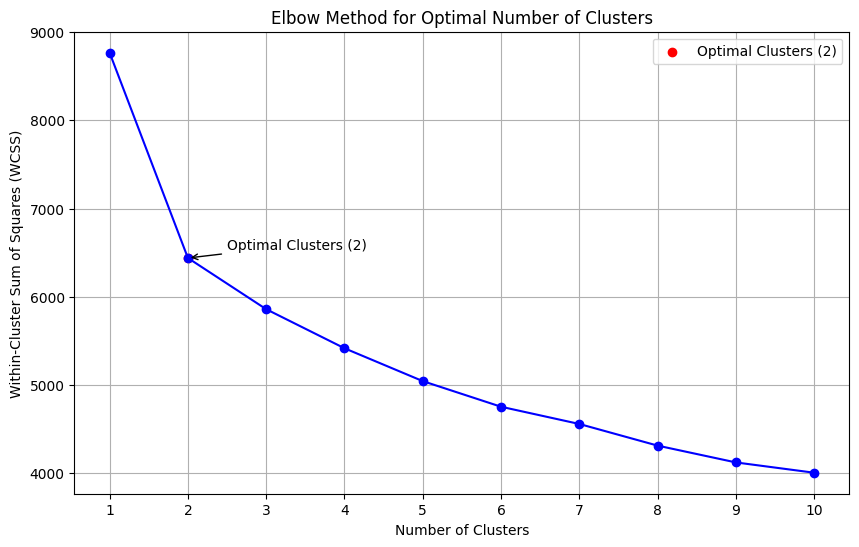

In [101]:
# Calculate within-cluster sum of squares (WCSS) for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))

# Mark the optimal number of clusters (k=2)
optimal_clusters = 2
plt.scatter(optimal_clusters, wcss[optimal_clusters - 1], color='red', label=f'Optimal Clusters ({optimal_clusters})')
plt.annotate(f'Optimal Clusters ({optimal_clusters})', xy=(optimal_clusters, wcss[optimal_clusters - 1]),
             xytext=(optimal_clusters + 0.5, wcss[optimal_clusters - 1] + 100),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.grid(True)
plt.legend()
plt.show()


* *inference* -
* 2 clusters are recommended by the elbow graph

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numerical)

# Apply KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
df2['Cluster'] = cluster_labels

# Display the updated dataframe with cluster labels
df2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Service Experience,Comfort,Model Name,TFIDF_feature_1,TFIDF_feature_2,Cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,< 5000 kms,1,3.0,4.0,1.0,4.0,TVS iQube,0.271154,-0.064785,0
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,1.0,3.0,TVS iQube,0.373681,0.101202,0
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,2.0,5.0,TVS iQube,0.353868,-0.108173,1
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,1.0,1.0,TVS iQube,0.225510,-0.156518,0
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,1.0,3.0,TVS iQube,0.303177,-0.149095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,2.0,2.0,Gemopai Ryder,0.209719,0.053318,0
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,Gemopai Ryder,0.278667,0.094604,1
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,2.0,5.0,Gemopai Ryder,0.299924,-0.161410,0
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,1.0,4.0,Gemopai Ryder,0.227316,0.052657,1


#4. Model Interpretability

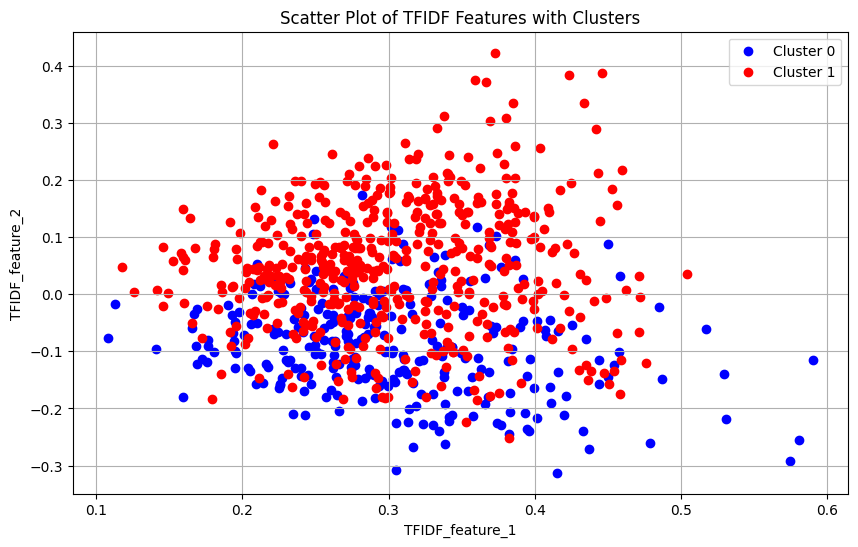

In [44]:
import matplotlib.pyplot as plt

# Create scatter plot for cluster 0
plt.figure(figsize=(10, 6))
plt.scatter(df2[df2['Cluster'] == 0]['TFIDF_feature_1'],
            df2[df2['Cluster'] == 0]['TFIDF_feature_2'],
            color='blue', label='Cluster 0')

# Create scatter plot for cluster 1
plt.scatter(df2[df2['Cluster'] == 1]['TFIDF_feature_1'],
            df2[df2['Cluster'] == 1]['TFIDF_feature_2'],
            color='red', label='Cluster 1')

# Set labels and title
plt.xlabel('TFIDF_feature_1')
plt.ylabel('TFIDF_feature_2')
plt.title('Scatter Plot of TFIDF Features with Clusters')
plt.legend()
plt.grid(True)
plt.show()


* *Inferences*-
* Sentiment analysis of reviews has resulted in the segmentation of data into two distinct clusters.
* These clusters represent different sentiment patterns expressed by users in their reviews.
* The segmentation facilitates targeted analysis of user sentiments and preferences.
* Further exploration of these segments can unveil insights into factors driving user satisfaction and perceptions.

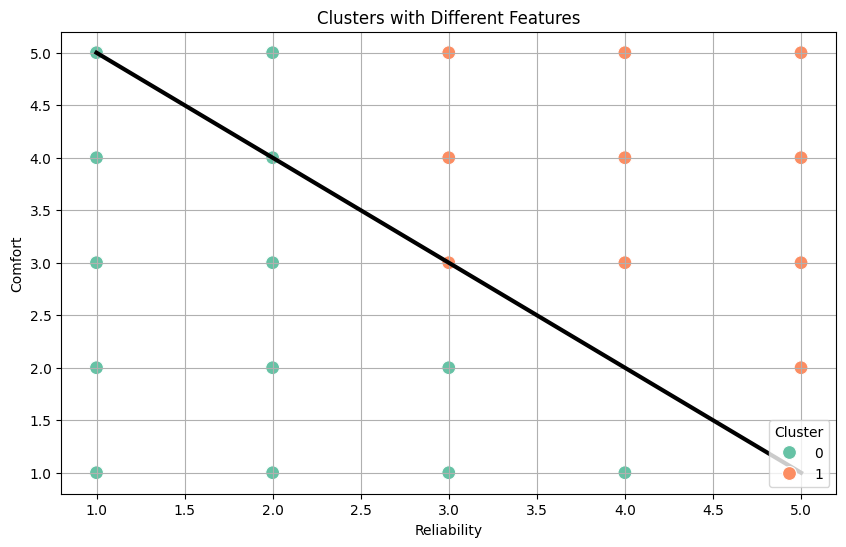

In [57]:
# Create scatter plot
plt.figure(1,2,figsize=(10, 6))
sns.scatterplot(data=df2, x='Reliability', y='Comfort', hue='Cluster', palette='Set2', s=100)
# line
x = [1,5]
y = [5,1]
plt.plot(x,y,color = 'black',linewidth = 3)

plt.title('Clusters with Different Features')
plt.xlabel('Reliability')
plt.ylabel('Comfort')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

* *Inference*-

* The clusters identified through analysis appear to be closely aligned with the ratings provided by users for electric vehicle (EV) two-wheelers.
* Cluster 1 predominantly consists of reviews with higher ratings, typically 3 or above, suggesting positive sentiment towards the EV models.
* In contrast, Cluster 0 primarily comprises reviews with lower ratings, often less than 3, indicating negative or less favorable sentiment towards the EVs.
* This alignment between clusters and user ratings indicates that the clustering process effectively captures and segregates reviews based on the perceived satisfaction levels of users with the EV two-wheelers.

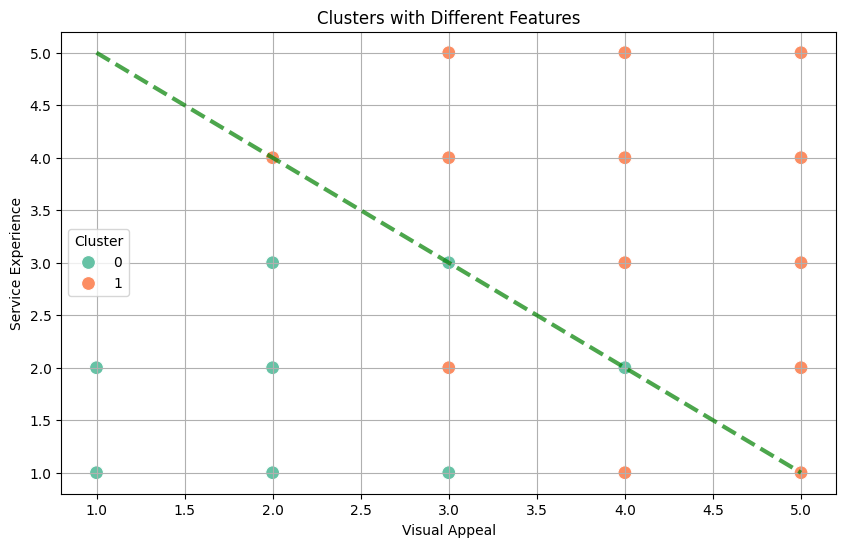

In [76]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Visual Appeal', y='Service Experience', hue='Cluster', palette='Set2', s=100)
# line plot
x = [1,5]
y = [5,1]
plt.plot(x,y,color = 'g',linewidth = 3,alpha=0.7,animated = True,linestyle='--')
plt.title('Clusters with Different Features')
plt.xlabel('Visual Appeal')
plt.ylabel('Service Experience')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

* *Inferences*-

**Service Experience Clusters:**

* The segmentation based on service experience reveals two distinct clusters, with Cluster 1 representing higher ratings (3 or more) and Cluster 0 indicating lower ratings (less than 3).
* Users in Cluster 1 likely have positive experiences with the service aspects of EV two-wheelers, while those in Cluster 0 may express dissatisfaction or encounter issues with service quality or support.

**Visual Appeal Clusters:**

* Analysis of visual appeal ratings also results in the formation of two clusters, with Cluster 1 characterized by higher ratings (3 or more) and Cluster 0 exhibiting lower ratings (less than 3).
*Users in Cluster 1 are likely impressed by the aesthetic design and appeal of the EV models, whereas those in Cluster 0 may perceive the visual aspects less favorably or find room for improvement.

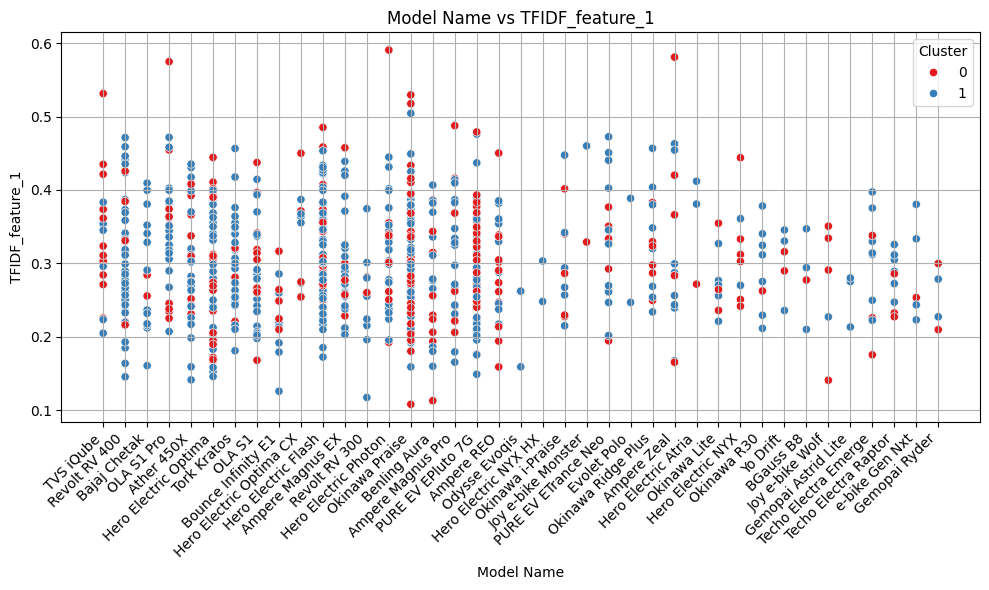

In [67]:

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Model Name', y='TFIDF_feature_1', hue='Cluster', palette='Set1')
plt.title('Model Name vs TFIDF_feature_1')
plt.xlabel('Model Name')
plt.ylabel('TFIDF_feature_1')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

* *Inferences*-

**Positive Sentiments:**

* Models such as **Revolt RV 400**, **Hero Electric Flash**,**Tork Kritos** evoke positive sentiments among users in the two-wheeler segment.
* These models likely receive favorable reviews and higher ratings from users, indicating satisfaction with various aspects such as performance, design, and service experience.

**Negative Sentiments:**

* Conversely, models like Okinawa Praise and PURE EV EPluto 7G appear to elicit negative sentiments among users.
* Users may express dissatisfaction or encounter issues with these models, leading to lower ratings and less favorable reviews.
* Negative sentiments could stem from factors such as performance issues, reliability concerns, or perceived shortcomings in features or service support.

